## 시계열 데이터
- 한글 헤더 읽기 EUC_KR

In [1]:
!curl -L https://bit.ly/2YpQu03 -o weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0    448      0 --:--:-- --:--:-- --:--:--   448
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 78415  100 78415    0     0  46870      0  0:00:01  0:00:01 --:--:-- 46870


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open("weather.csv", "rt", encoding="EUC_KR") as fr:
    lines = fr.readlines()

In [5]:
lines[:10]

['저장한 날짜: 2017/10/24 11:09:57,,,\n',
 ',,,\n',
 ',서울,서울,서울\n',
 '연월일,평균기온,평균기온,평균기온\n',
 ',,품질정보,균질정보\n',
 '2006/1/1,3.6,8,1\n',
 '2006/1/2,4,8,1\n',
 '2006/1/3,3.7,8,1\n',
 '2006/1/4,4,8,1\n',
 '2006/1/5,3.6,8,1\n']

In [8]:
n_lines = ["연,월,일,기온,품질,균질\n"] + lines[5:]

In [9]:
n_lines[:10]

['연,월,일,기온,품질,균질\n',
 '2006/1/1,3.6,8,1\n',
 '2006/1/2,4,8,1\n',
 '2006/1/3,3.7,8,1\n',
 '2006/1/4,4,8,1\n',
 '2006/1/5,3.6,8,1\n',
 '2006/1/6,2.1,8,1\n',
 '2006/1/7,2.8,8,1\n',
 '2006/1/8,4.2,8,1\n',
 '2006/1/9,3.7,8,1\n']

In [10]:
n_lines = map(lambda x: x.replace('/', ','), n_lines)
result = "".join(n_lines).strip()

with open("new_data.csv", "wt", encoding="utf-8") as fw:
    fw.write(result)

In [11]:
import pandas as pd
df = pd.read_csv('new_data.csv', encoding="utf-8")
df.shape

(4018, 6)

In [13]:
!head -10 new_data.csv

연,월,일,기온,품질,균질
2006,1,1,3.6,8,1
2006,1,2,4,8,1
2006,1,3,3.7,8,1
2006,1,4,4,8,1
2006,1,5,3.6,8,1
2006,1,6,2.1,8,1
2006,1,7,2.8,8,1
2006,1,8,4.2,8,1
2006,1,9,3.7,8,1


In [12]:
df[:5]

,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1


In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [23]:
df["기온"].values.shape

(4018,)

In [24]:
temp = df["기온"].values
train = temp[:3000]
test = temp[3000:]

In [25]:
def make_data(data, n_steps):
    x = []
    y = []
    for i in range(len(data)):
        if i > len(data) - n_steps - 1 : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [26]:
data = [1,2,3,4,5,6,7,8,9,10]
p,q = make_data(data,3)
p,q

(array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5],
        [4, 5, 6],
        [5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]]),
 array([ 4,  5,  6,  7,  8,  9, 10]))

In [29]:
n_steps = 10
train_x, train_y = make_data(train, n_steps)
test_x, test_y = make_data(test, n_steps)

In [30]:
len(train_x), len(test_x)

(2990, 1008)

In [31]:
len(train_y), len(test_y)

(2990, 1008)

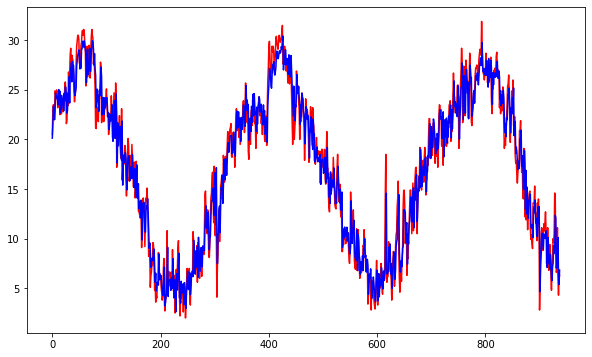

In [54]:
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) 
pred_y = lr.predict(test_x)

# 결과를 그래프로 그리기
plt.figure(figsize=(10, 6))
plt.plot(test_y, c='r')
plt.plot(pred_y, c='b')
plt.show()

In [34]:
error = abs(pred_y  - test_y)
print("average=", error.mean())
print("max=", max(error))
lr.score(test_x, test_y) # R2

average= 1.4992721234688688
max= 8.623504996019207


0.9353090415149158

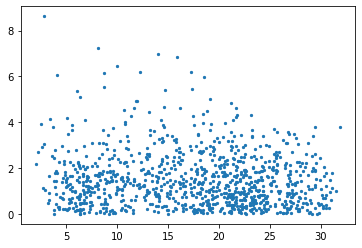

In [35]:
plt.scatter(test_y, error, s=5)

In [47]:
for i in range(1,365):
    train_x, train_y = make_data(train, i)
    test_x, test_y = make_data(test, i)
    lr = LinearRegression(normalize=True)
    lr.fit(train_x, train_y)
    print(i, lr.score(test_x, test_y).round(4))

1 0.9272
2 0.9277
3 0.9311
4 0.9321
5 0.9324
6 0.9337
7 0.934
8 0.9347
9 0.9348
10 0.9353
11 0.9353
12 0.9354
13 0.9353
14 0.9355
15 0.9354
16 0.9354
17 0.9357
18 0.9361
19 0.9361
20 0.9363
21 0.9363
22 0.9364
23 0.9365
24 0.9365
25 0.9365
26 0.9367
27 0.9366
28 0.9369
29 0.937
30 0.9372
31 0.9372
32 0.9376
33 0.9377
34 0.9376
35 0.9382
36 0.9382
37 0.9382
38 0.9377
39 0.9382
40 0.9381
41 0.9381
42 0.9381
43 0.9383
44 0.9381
45 0.9379
46 0.938
47 0.9381
48 0.9383
49 0.9383
50 0.9384
51 0.9383
52 0.9384
53 0.9383
54 0.9383
55 0.9383
56 0.9384
57 0.9384
58 0.9384
59 0.9383
60 0.9383
61 0.9381
62 0.9382
63 0.9385
64 0.9385
65 0.9387
66 0.9389
67 0.939
68 0.939
69 0.9391
70 0.9392
71 0.9393
72 0.9392
73 0.9393
74 0.9393
75 0.9393
76 0.9392
77 0.9391
78 0.9393
79 0.9393
80 0.9394
81 0.9393
82 0.9393
83 0.9392
84 0.939
85 0.9391
86 0.939
87 0.9389
88 0.939
89 0.939
90 0.9389
91 0.9389
92 0.9389
93 0.9389
94 0.9385
95 0.9388
96 0.9388
97 0.9387
98 0.9387
99 0.9388
100 0.9385
101 0.9384
102 0.

In [37]:
lr.coef_.round(3), lr.intercept_

(array([ 0.04 ,  0.033,  0.011,  0.047,  0.032,  0.042,  0.004,  0.109,
        -0.158,  0.826]),
 0.22996970252452087)

## MLP 사용

In [48]:
n_steps = 30
train_x, train_y = make_data(train, n_steps)
test_x, test_y = make_data(test, n_steps)

In [49]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_steps,))) 
model.add(Dense(20, activation='relu'))
# model.add(Dense(300, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 200)               16200     
_________________________________________________________________
dense_9 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 201       
Total params: 56,601
Trainable params: 56,601
Non-trainable params: 0
_________________________________________________________________


In [51]:
from sklearn.metrics import r2_score
model.fit(train_x, train_y, epochs=100, batch_size=50)
y_pred = model.predict(test_x, verbose=0)
r2_score(test_y, y_pred)

Epoch 1/100
2920/2920 [==============================] - 1s 274us/step - loss: 54.4261
Epoch 2/100
2920/2920 [==============================] - 0s 76us/step - loss: 6.4642
Epoch 3/100
2920/2920 [==============================] - 0s 78us/step - loss: 5.6462
Epoch 4/100
2920/2920 [==============================] - 0s 79us/step - loss: 5.2924
Epoch 5/100
2920/2920 [==============================] - 0s 77us/step - loss: 5.2875
Epoch 6/100
2920/2920 [==============================] - 0s 77us/step - loss: 4.7617
Epoch 7/100
2920/2920 [==============================] - 0s 76us/step - loss: 4.7211
Epoch 8/100
2920/2920 [==============================] - 0s 75us/step - loss: 4.4265
Epoch 9/100
2920/2920 [==============================] - 0s 77us/step - loss: 4.8663
Epoch 10/100
2920/2920 [==============================] - 0s 81us/step - loss: 4.1905
Epoch 11/100
2920/2920 [==============================] - 0s 77us/step - loss: 4.2039
Epoch 12/100
2920/2920 [==============================] - 0s 

2920/2920 [==============================] - 0s 84us/step - loss: 2.1623
Epoch 97/100
2920/2920 [==============================] - 0s 83us/step - loss: 2.9598
Epoch 98/100
2920/2920 [==============================] - 0s 83us/step - loss: 2.3954
Epoch 99/100
2920/2920 [==============================] - 0s 83us/step - loss: 2.2940
Epoch 100/100
2920/2920 [==============================] - 0s 83us/step - loss: 2.5667


0.9248855898323856

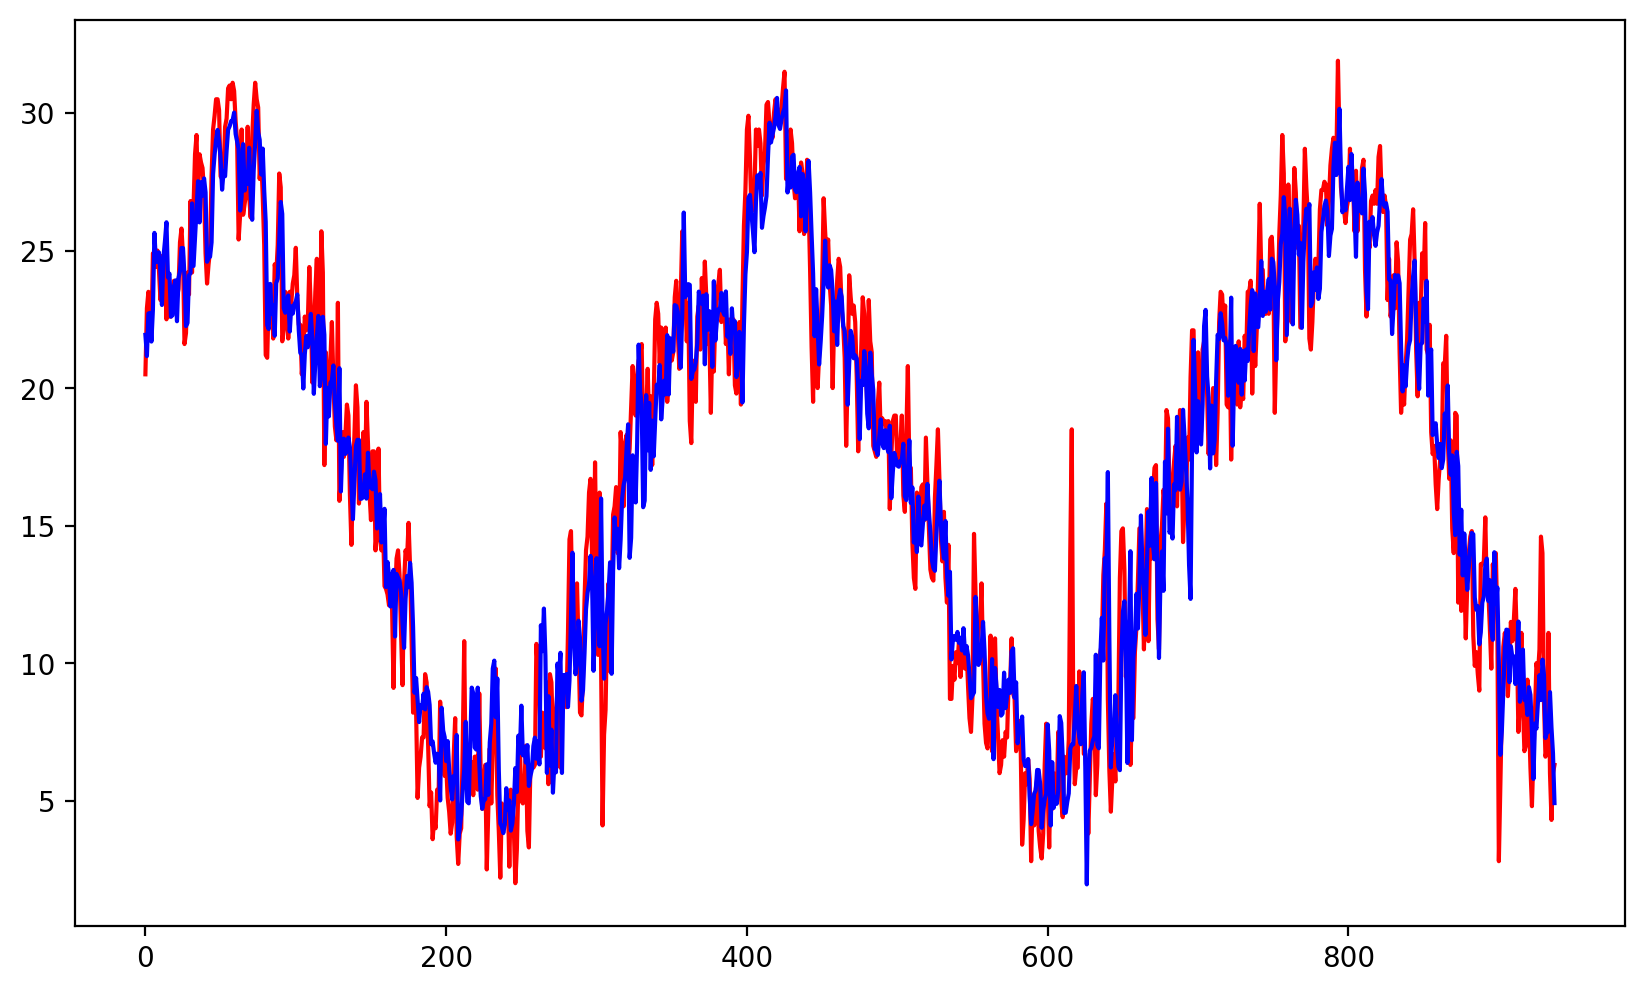

In [52]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(test_y, c='r')
plt.plot(y_pred, c='b')
plt.show()

In [0]:
model
